In [10]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Embedding


In [20]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def clean(text):
    # Lowering letters
    text = text.lower()
    # Removing html tags
    text = re.sub('<[^>]*>', '', text)
    # Removing emails
    text = re.sub('\S*@\S*\s?', '', text)
    # Removing urls
    text = re.sub('https?://[A-Za-z0-9]', '', text)
    # Removing numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    word_tokens = word_tokenize(text)
    filtered_sentence = []
    for word_token in word_tokens:
        if word_token not in stop_words:
            filtered_sentence.append(word_token)

    # Joining words
    text = (' '.join(filtered_sentence))
    return text

In [21]:
def read_files(path):
    file_contents = list()
    filenames = os.listdir(path)

    for i in range(len(filenames)):
        with open(path + filenames[i]) as f:
            file_contents.append(f.read())

    return file_contents

In [25]:
class_0 = read_files('TrainingData/20news-18828/hardware/')
class_1 = read_files('TrainingData/20news-18828/OS/')
class_2 = read_files('TrainingData/20news-18828/vehcile/')
class_3 = read_files('TrainingData/20news-18828/sport/')
class_4 = read_files('TrainingData/20news-18828/med/')
class_5 = read_files('TrainingData/20news-18828/space/')
class_6 = read_files('TrainingData/20news-18828/religion/')
class_7 = read_files('TrainingData/20news-18828/politics/')
class_8 = read_files('TrainingData/20news-18828/crypt/')
class_9 = read_files('TrainingData/20news-18828/forsale/')

In [62]:
labels = ['hardware', 'OS', 'vehcile', 'sport','med','space','religion','politics','crypt','forsale']

2922


In [30]:
all_texts = np.append(class_0, class_1)
all_texts = np.append(all_texts, class_2)
all_texts = np.append(all_texts, class_3)
all_texts = np.append(all_texts, class_4)
all_texts = np.append(all_texts, class_5)
all_texts = np.append(all_texts, class_6)
all_texts = np.append(all_texts, class_7)
all_texts = np.append(all_texts, class_8)
all_texts = np.append(all_texts, class_9)

In [31]:
all_cleaned_texts = np.array([clean(text) for text in all_texts])


In [93]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_cleaned_texts);

In [94]:
all_encoded_texts = tokenizer.texts_to_sequences(all_cleaned_texts)
all_encoded_texts = np.array(all_encoded_texts,dtype=object)
all_encoded_texts = pad_sequences(all_encoded_texts, maxlen=500)

In [95]:
labels_0 = np.array([0] * len(class_0))
labels_1 = np.array([1] * len(class_1))
labels_2 = np.array([2] * len(class_2))
labels_3 = np.array([3] * len(class_3))
labels_4 = np.array([4] * len(class_4))
labels_5 = np.array([5] * len(class_5))
labels_6 = np.array([6] * len(class_6))
labels_7 = np.array([7] * len(class_7))
labels_8 = np.array([8] * len(class_8))
labels_9 = np.array([9] * len(class_9))



In [96]:
all_labels = np.append(labels_0, labels_1)
all_labels = np.append(all_labels, labels_2)
all_labels = np.append(all_labels, labels_3)
all_labels = np.append(all_labels, labels_4)
all_labels = np.append(all_labels, labels_5)
all_labels = np.append(all_labels, labels_6)
all_labels = np.append(all_labels, labels_7)
all_labels = np.append(all_labels, labels_8)
all_labels = np.append(all_labels, labels_9)


In [97]:
all_labels.shape

(16929,)

In [98]:
all_labels = all_labels[:, np.newaxis]

In [99]:
all_labels.shape

(16929, 1)

In [100]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [101]:
all_labels = one_hot_encoder.fit_transform(all_labels)

C:\Users\mohda\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
X_train, X_test, y_train, y_test = train_test_split(all_encoded_texts, all_labels, test_size=0.2, random_state=11)

In [103]:
len(tokenizer.word_index)

87053

In [105]:
from tensorflow.keras.optimizers.legacy import Adam
import tensorflow as tf
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=500))
model.add(LSTM(100))
model.add(Dense(10, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=40, batch_size=32,callbacks=[callback], validation_data=(X_test, y_test))


Epoch 1/40
424/424 [==============================] - 75s 172ms/step - loss: 1.8115 - accuracy: 0.3380 - val_loss: 1.2746 - val_accuracy: 0.5260
Epoch 2/40
424/424 [==============================] - 72s 171ms/step - loss: 1.0986 - accuracy: 0.6195 - val_loss: 1.2566 - val_accuracy: 0.5538
Epoch 3/40
424/424 [==============================] - 74s 174ms/step - loss: 0.6755 - accuracy: 0.7650 - val_loss: 0.9769 - val_accuracy: 0.6548
Epoch 4/40
424/424 [==============================] - 75s 178ms/step - loss: 0.3653 - accuracy: 0.8889 - val_loss: 0.5979 - val_accuracy: 0.8157
Epoch 5/40
424/424 [==============================] - 75s 177ms/step - loss: 0.1509 - accuracy: 0.9592 - val_loss: 0.5388 - val_accuracy: 0.8420
Epoch 6/40
424/424 [==============================] - 76s 178ms/step - loss: 0.1112 - accuracy: 0.9719 - val_loss: 0.4934 - val_accuracy: 0.8618
Epoch 7/40
424/424 [==============================] - 76s 180ms/step - loss: 0.1503 - accuracy: 0.9578 - val_loss: 0.5785 - val_ac

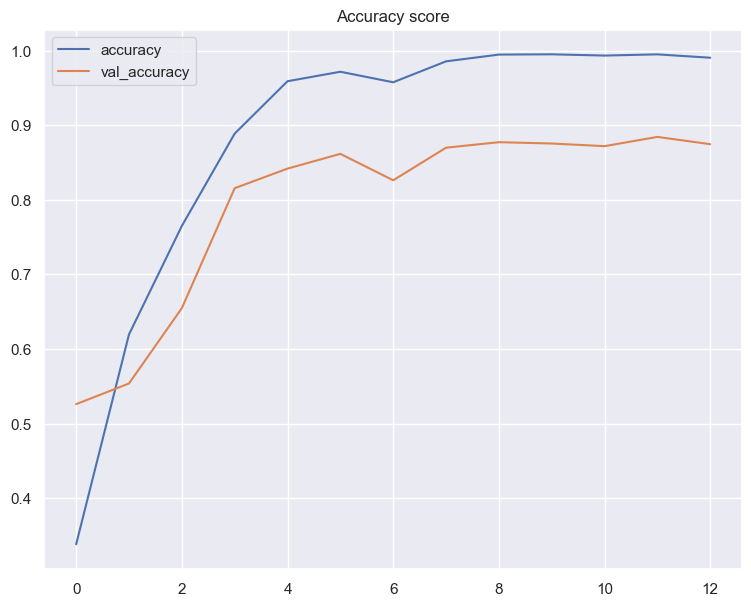

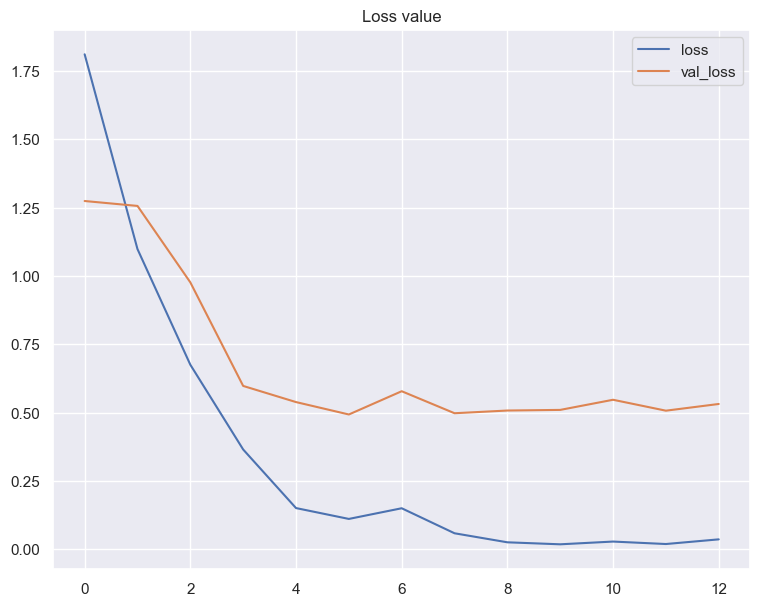

In [106]:
plt.figure(figsize=(9,7))
plt.title('Accuracy score')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(9,7))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [107]:
string = "Issues central to this discipline include diplomatic relations, globalization, state sovereignty, ecological sustainability, nuclear proliferation, nationalism, economic development, global finance, international security, terrorism, and human rights."

In [108]:
cleaned_string = clean(string)

In [109]:
encoded_string = tokenizer.texts_to_sequences([cleaned_string])
encoded_string

[[757,
  2111,
  7513,
  394,
  8876,
  2267,
  111,
  8342,
  28588,
  1376,
  18535,
  6914,
  1574,
  779,
  2858,
  7520,
  754,
  371,
  2430,
  254,
  288]]

In [110]:
encoded_string = pad_sequences(encoded_string, maxlen=500)
encoded_string

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [111]:
string_predict = model.predict(encoded_string)

1/1 [==============================] - 0s 463ms/step


In [112]:
print(string_predict)

[[0.06598216 0.3376391  0.09574795 0.1926564  0.00255328 0.39766106
  0.61917895 0.999462   0.8647662  0.02929357]]


In [113]:
print(np.argmax(string_predict))

7


In [114]:
import pandas as pd

hist_df = pd.DataFrame(history.history) 

In [115]:
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

In [116]:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [117]:
pd.read_csv('history.csv') 

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,1.811453,0.337961,1.274608,0.525989
1,1,1.098609,0.619508,1.256619,0.553751
2,2,0.675477,0.765045,0.976872,0.654755
3,3,0.365291,0.888946,0.597892,0.815712
4,4,0.150943,0.959241,0.538803,0.841996
5,5,0.111205,0.971941,0.493418,0.861784
6,6,0.150262,0.957838,0.578519,0.826344
7,7,0.058702,0.985897,0.497991,0.870053
8,8,0.025661,0.994979,0.507886,0.877437
9,9,0.018344,0.995348,0.510188,0.875664


In [118]:
model.save('tag_classifier.h5')
